In [1]:
import numpy as np
import matplotlib.pyplot as plt

class ClientSelector:
    def __init__(self, config):
        self.num_clients = config['K']
        self.sample_size = int(max(config['C'] * self.num_clients, 1))
        self.client_indices = np.arange(self.num_clients)

        if config['participation'] == 'uniform':
            self.probabilities = None
        else:
            self.probabilities = np.random.dirichlet(
                alpha=np.full(self.num_clients, 1/config['gamma'])
            )

    def select(self):
        return np.random.choice(
            self.client_indices,
            size=self.sample_size,
            p=self.probabilities,
            replace=False
        )

def plot_client_participation(selector, num_rounds=10000, title=""):
    """Plot simple client participation distribution."""
    # Collect selections
    selections = []
    for _ in range(num_rounds):
        selections.append(selector.select())
    selections = np.array(selections).flatten()

    # Count selections per client
    clients, counts = np.unique(selections, return_counts=True)
    participation = np.zeros(selector.num_clients)
    for client, count in zip(clients, counts):
        participation[client] = count

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(range(selector.num_clients), participation,color = 'navy' , alpha=0.8)
    plt.xlabel('Client ID')
    plt.ylabel('Number of Times Selected')
    plt.title(f'Client Selection Distribution {title}')
    plt.grid(True, alpha=0.3)
    plt.show()




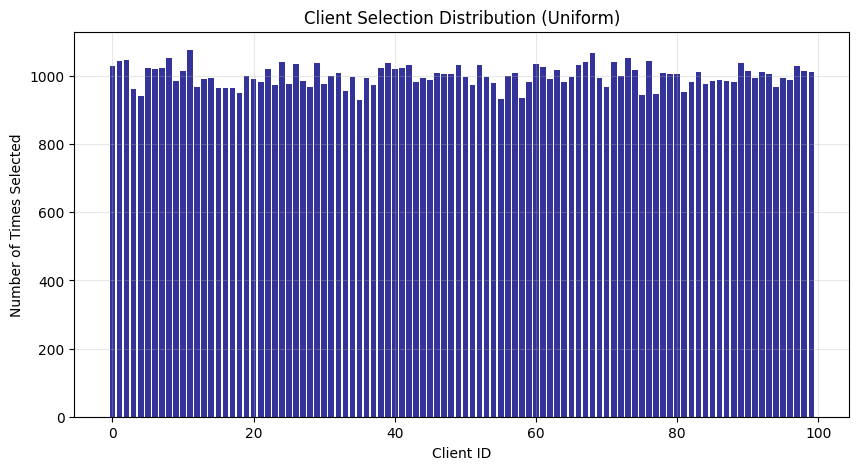

In [2]:
# Example usage
if __name__ == "__main__":
    np.random.seed(42)  # For reproducibility

    # Uniform participation
    config_uniform = {
        'K': 100,
        'C': 0.1,
        'participation': 'uniform'
    }
    selector_uniform = ClientSelector(config_uniform)
    plot_client_participation(selector_uniform, title="(Uniform)")


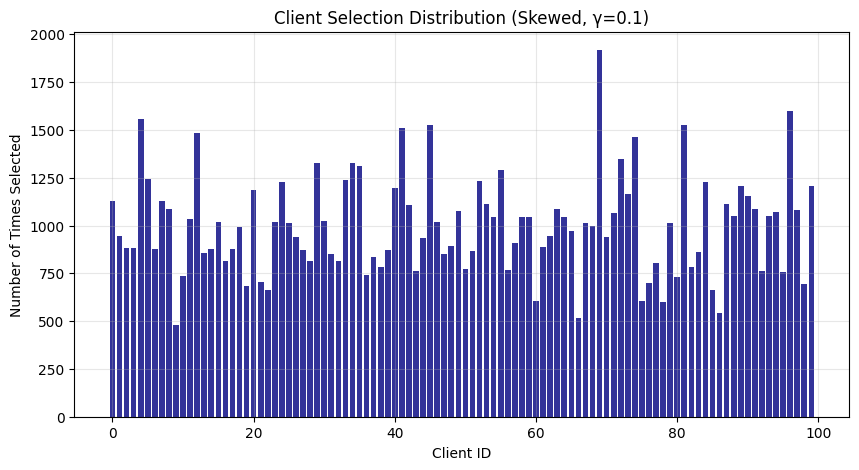

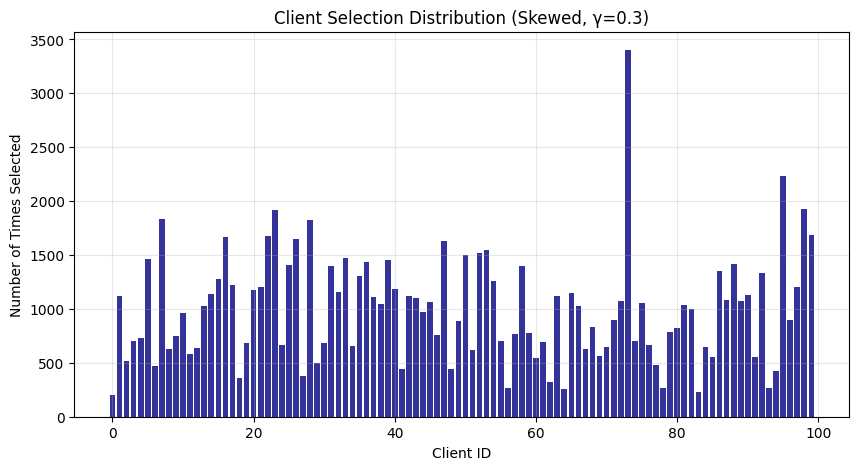

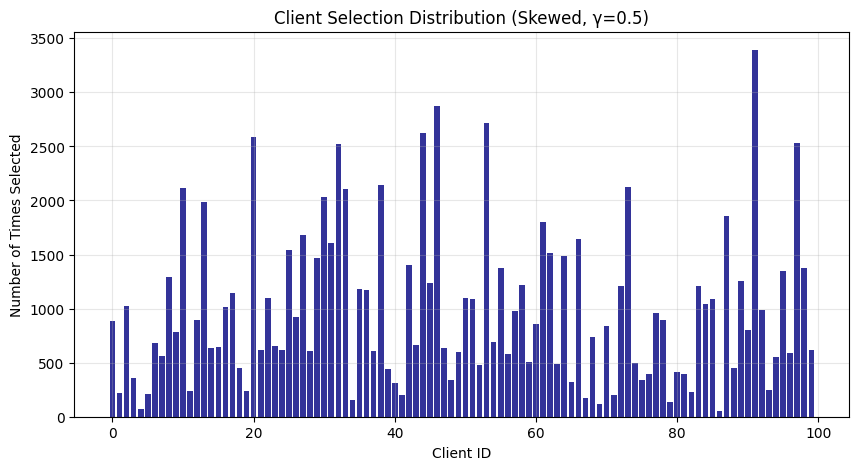

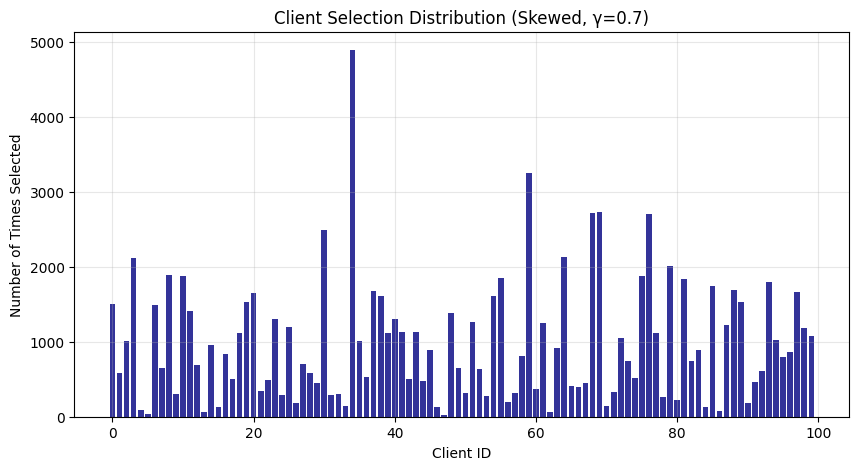

In [3]:
# Skewed participation with different gamma values
if __name__ == "__main__":
    np.random.seed(42)  # For reproducibility

    gamma_values = [0.1, 0.3, 0.5, 0.7]
    for gamma in gamma_values:
        config_skewed = {
            'K': 100,
            'C': 0.1,
            'participation': 'skewed',
            'gamma': gamma
        }
        selector_skewed = ClientSelector(config_skewed)
        plot_client_participation(selector_skewed, title=f"(Skewed, γ={gamma})")